In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [33]:
df = pd.read_csv('data/collegiate_athlete_injury_dataset.csv', index_col=0)

In [34]:
df.head(10)

,Age,Gender,Height_cm,Weight_kg,Position,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
Athlete_ID,,,,,,,,,,,,,,,,
A001,24,Female,195,99,Center,2,13,2,3,1,1,99,58,100,4,0
A002,21,Male,192,65,Forward,8,14,1,3,1,4,55,63,83,73,0
A003,22,Male,163,83,Guard,8,8,2,1,3,6,58,62,100,62,0
A004,24,Female,192,90,Guard,1,13,1,1,1,7,82,74,78,51,0
A005,20,Female,173,79,Center,3,9,1,2,1,2,90,51,83,49,0
A006,22,Female,180,75,Guard,9,14,3,4,1,6,74,84,99,54,0
A007,22,Female,179,90,Forward,5,13,1,4,2,7,97,56,78,84,1
A008,24,Female,167,64,Center,6,7,2,3,3,2,62,70,100,42,0
A009,19,Female,166,91,Guard,4,19,2,3,3,2,58,67,80,50,0


In [35]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

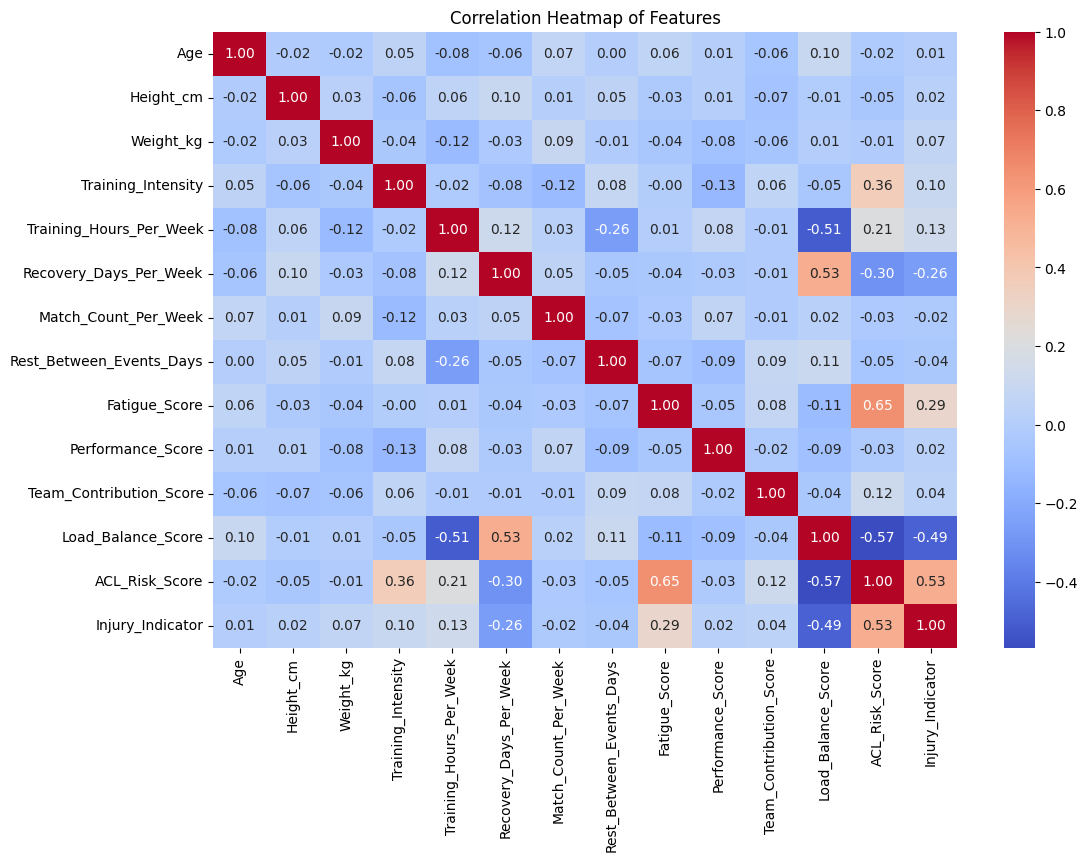

In [36]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

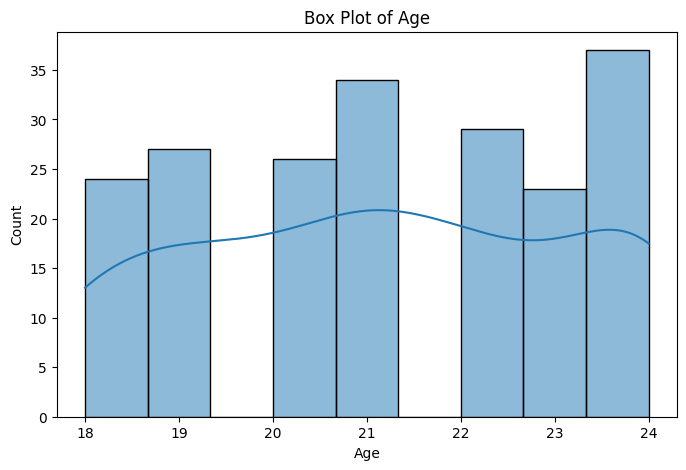

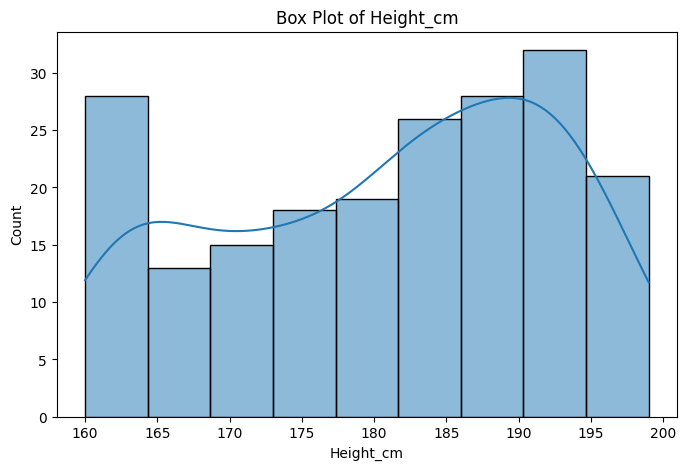

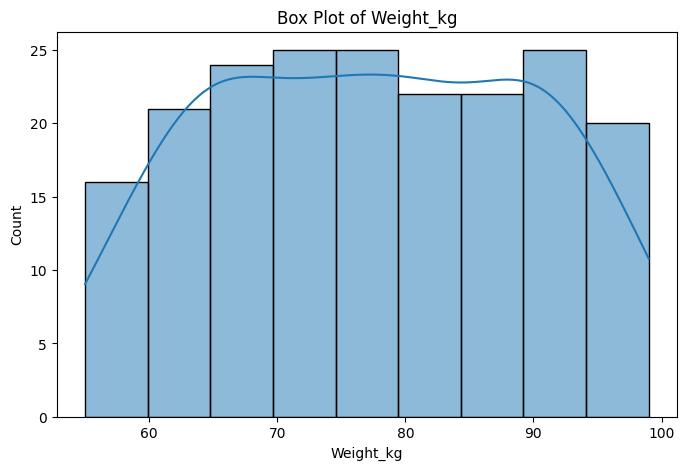

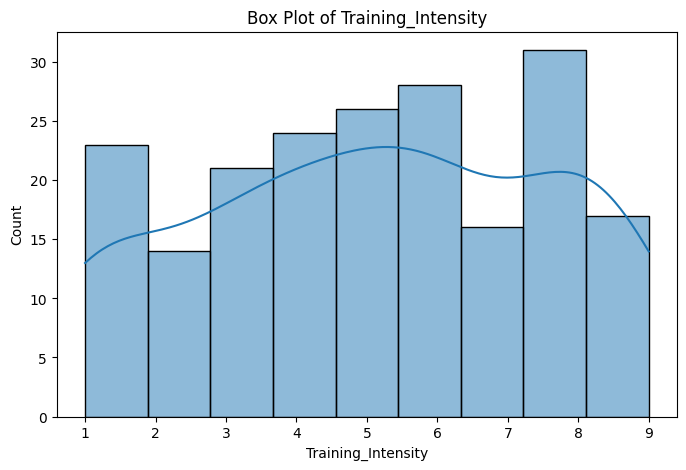

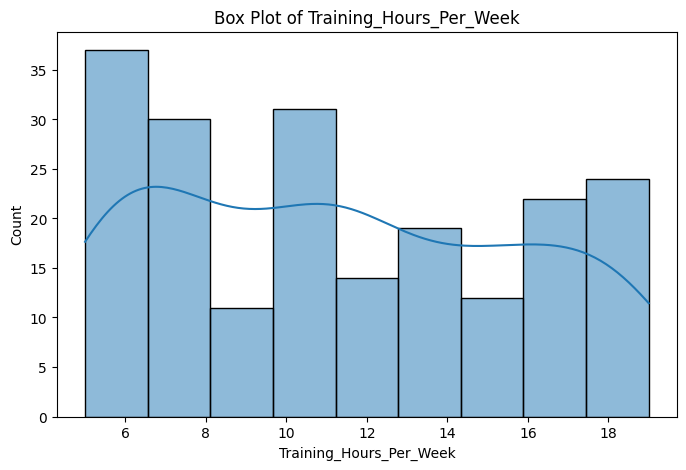

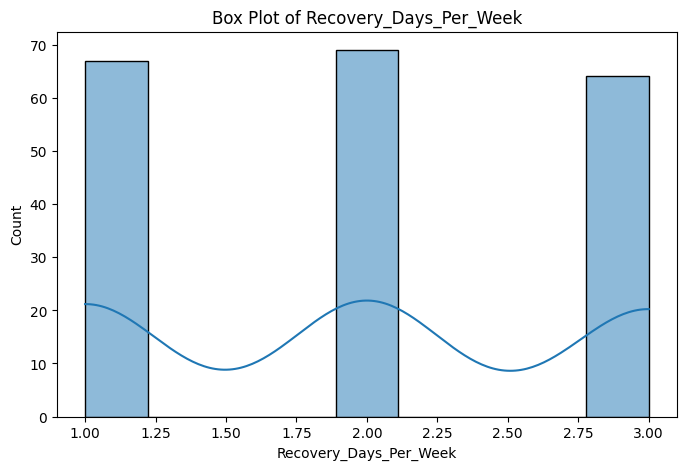

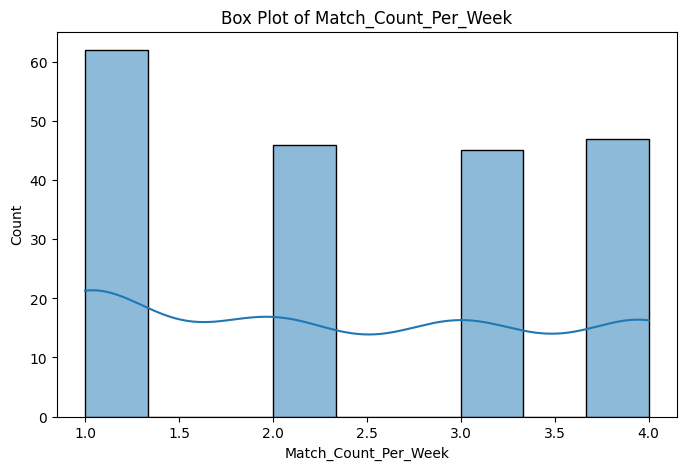

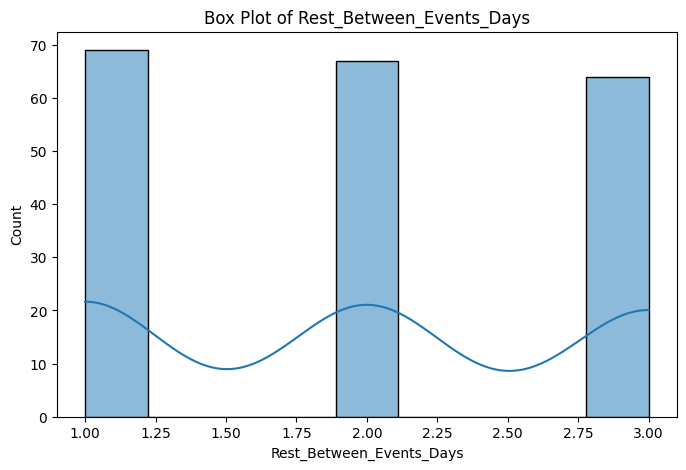

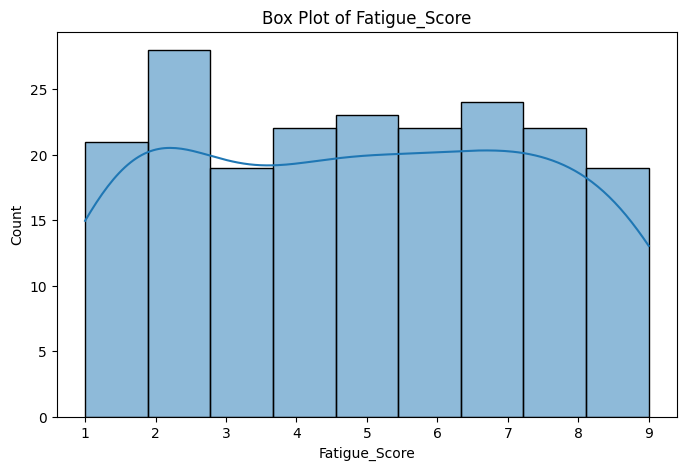

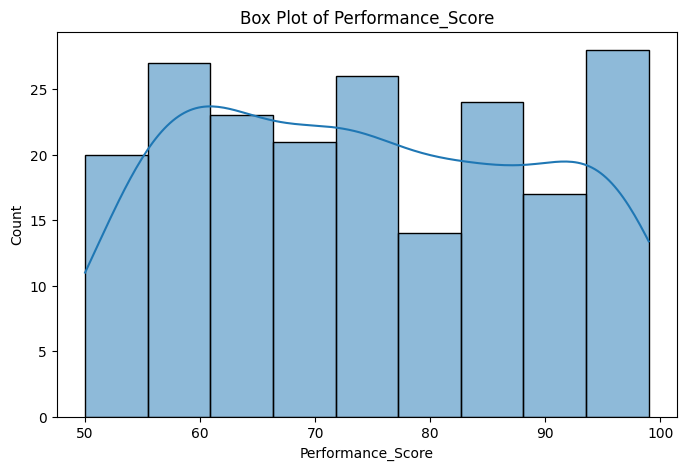

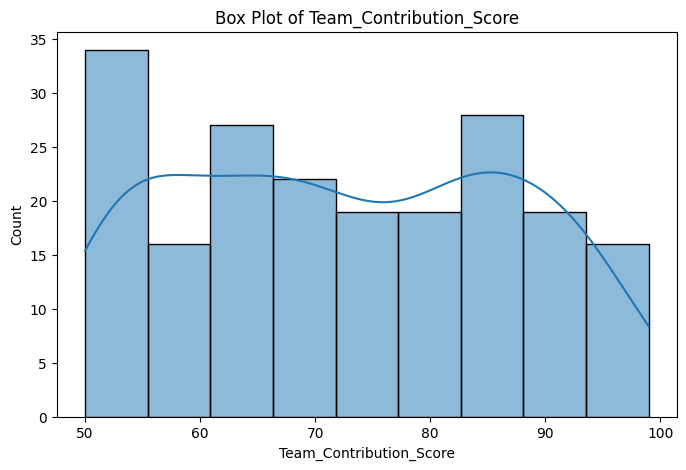

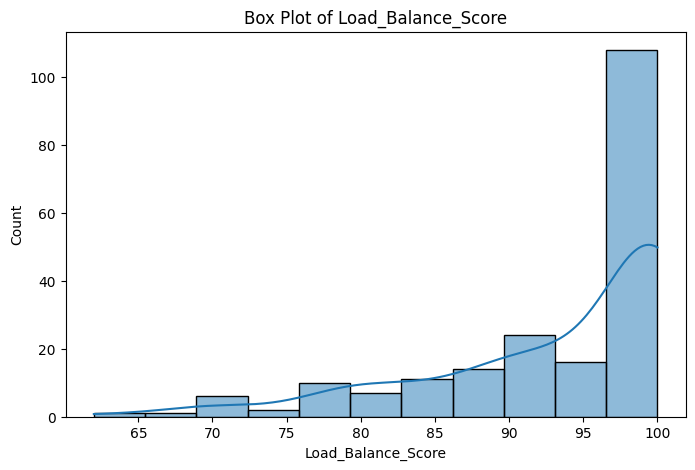

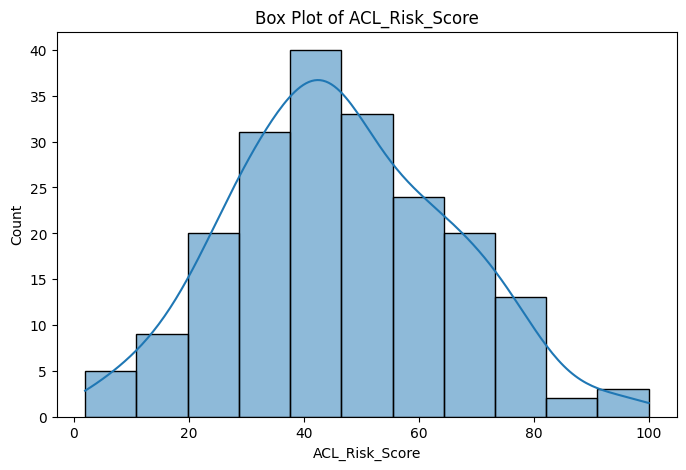

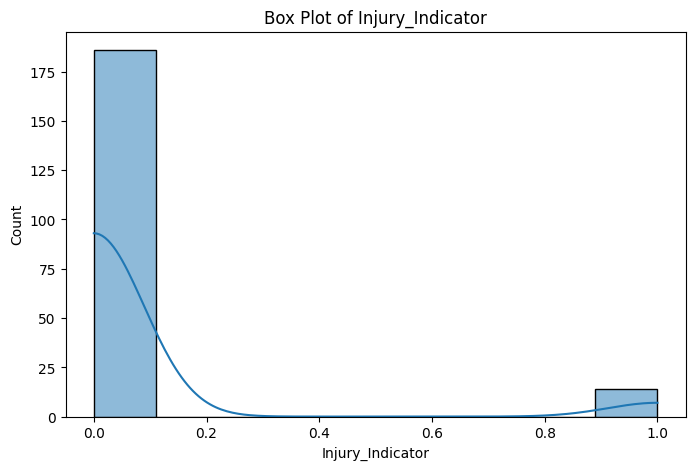

In [37]:
for col in num_cols:
  plt.figure(figsize=(8, 5))
  sns.histplot(df[col] , kde=True)
  plt.title(f'Box Plot of {col}')
  plt.show()

In [38]:
Gender_map = {"Male": 0, "Female": 1}
Position_map = {"Guard": 0, "Center": 1, "Forward": 2}

df["Gender"] = df["Gender"].map(Gender_map)
df["Position"] = df["Position"].map(Position_map)

In [39]:


# features = ["Age", "Gender", "Position", "Height_cm", "Weight_kg", "Training_Intensity", "Training_Hours_Per_Week",
#            "Recovery_Days_Per_Week", "Match_Count_Per_Week", "Load_Balance_Score", "Performance_Score",
#            "Team_Contribution_Score", "Load_Balance_Score"]

# X = df[['Age', 'Height_cm', 'Weight_kg', 'Match_Count_Per_Week', 'Training_Hours_Per_Week','Recovery_Days_Per_Week']]
threshold = 0.3

correlation_matrix = df.corr()
high_corr_features = correlation_matrix.index[abs(correlation_matrix["Load_Balance_Score"]) > threshold].tolist()
high_corr_features.remove("Load_Balance_Score")

# remove highly correlated binary feature
high_corr_features.remove("Injury_Indicator")
print(high_corr_features)

X = df[high_corr_features]
Y = df['Load_Balance_Score']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

['Training_Hours_Per_Week', 'Recovery_Days_Per_Week', 'ACL_Risk_Score']


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [41]:
linearRegressionModel = LinearRegression()

linearRegressionModel.fit(X_train , y_train)

LinearRegression()

In [42]:
y_pred = linearRegressionModel.predict(X_test)

In [43]:
decisionTreeModel = DecisionTreeRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10)

decisionTreeModel.fit(X_train , y_train)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10)

In [44]:
y_pred1 = decisionTreeModel.predict(X_test)

In [45]:
randomForestModel = RandomForestRegressor(n_estimators=100, random_state=42)

randomForestModel.fit(X_train , y_train)

RandomForestRegressor(random_state=42)

In [46]:
y_pred2 = randomForestModel.predict(X_test)

In [47]:
logisticRegression = LogisticRegression()

logisticRegression.fit(X_train , y_train)

LogisticRegression()

In [48]:
y_pred3 = logisticRegression.predict(X_test)

In [49]:
rmse_linear_regression = np.sqrt(np.mean((y_test - y_pred) ** 2))
print("Linear Regression RMSE:", rmse_linear_regression)

rmse_decision_tree = np.sqrt(np.mean((y_test - y_pred1) ** 2))
print("Decision Tree RMSE:", rmse_decision_tree)

rmse_random_forest = np.sqrt(np.mean((y_test - y_pred2) ** 2))
print("Random Forest RMSE:", rmse_random_forest)


Linear Regression RMSE: 4.736916116611988
Decision Tree RMSE: 8.427277300097806
Random Forest RMSE: 6.496530298635454


In [50]:
linearRegressionModel.fit(X_test, y_test)

LinearRegression()

In [51]:
prediction = linearRegressionModel.predict([X_test[0]])

print(X_test[0])

print(f"Prediction for the first test data point (X_test[0]): {prediction}")


[-0.07114077 -1.21727916  0.45140547]
Prediction for the first test data point (X_test[0]): [89.86158016]


In [52]:
m = linearRegressionModel.coef_
b = linearRegressionModel.intercept_

print(f"Linear regression. Slope: {m}. Intercept: {b}")

Linear regression. Slope: [-2.39054599  3.61302264 -1.33167715]. Intercept: 94.69069838350765


In [53]:
# predict one row of testing data
y_pred = linearRegressionModel.predict(X_test)
print(y_pred)

[ 89.86158016  94.89038898  95.45297795  94.56569855 100.83295968
  92.72585944  94.63617057  90.9640589   94.15918628  99.70778173
  95.05143616  95.24653236 100.83414688  90.89974455  95.64169481
  92.09279845 100.08402825 100.41250195 103.04147876  97.76082593
  97.07999212 101.06826215  95.03133302  89.46263443  97.89939558
  96.32749909  90.4291396   96.77421763  99.44859285  93.47716527
 101.82075518 101.13873417  91.79199442  98.81174859  99.84872578
 101.96051203  93.46203261  91.11116061  99.51906487  94.67518964]


[-0.07114077 -0.07114077 -0.74867189  1.28392147 -1.42620301 -0.97451559
  1.28392147 -0.97451559 -0.74867189 -0.07114077 -0.97451559  1.05807777
 -0.74867189  1.50976518 -0.29698447 -0.29698447  0.15470294 -0.07114077
 -1.2003593   1.50976518  1.73560888 -1.2003593  -0.07114077  0.15470294
  0.15470294  1.28392147  1.05807777  1.50976518 -0.52282818 -1.2003593
 -0.74867189 -1.2003593   1.28392147 -0.97451559 -0.07114077 -1.42620301
  1.50976518  1.50976518 -0.52282818 -1.2003593 ]


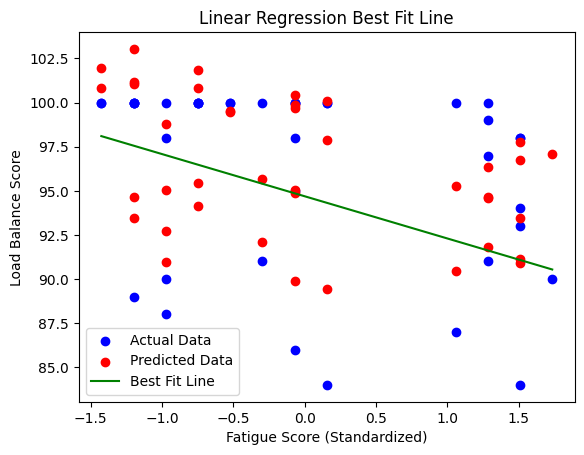

In [54]:
plt.scatter(X_test[:, 0], y_test, color='blue', label="Actual Data")
plt.scatter(X_test[:, 0], y_pred, color='red', label="Predicted Data")

plt.xlabel("Fatigue Score (Standardized)")
plt.ylabel("Load Balance Score")
plt.legend()
plt.title("Linear Regression Best Fit Line")
print(X_test[:, 0])
X_test_sorted = np.sort(X_test[:, 0])  # Sort for line plotting
Y_pred_sorted = linearRegressionModel.predict(np.column_stack((X_test_sorted, np.zeros((X_test_sorted.shape[0], X_test.shape[1]-1)))))
plt.plot(X_test_sorted, Y_pred_sorted, color='green', label="Best Fit Line")

plt.legend()
plt.show()

In [62]:
# Separate model for predicting ACL_Risk_Score for a better Ufatigue

fatigue = df[['Fatigue_Score']]
ars = df['ACL_Risk_Score']

X_train, X_test, y_train, y_test = train_test_split(fatigue, ars, test_size=0.2, random_state=42)

In [63]:
# ACL Risk Score Prediction
ars_linearRegressionModel = LinearRegression()
ars_linearRegressionModel.fit(X_train , y_train)
y_pred = ars_linearRegressionModel.predict(X_test)

rmse_linear_regression = np.sqrt(np.mean((y_test - y_pred) ** 2))
print("Linear Regression RMSE for ACL Risk Score:", rmse_linear_regression)

Linear Regression RMSE for ACL Risk Score: 10.68119735909229


In [57]:
with open('../../API/model.pkl', 'wb') as f:
    pickle.dump(linearRegressionModel, f)

with open('../../API/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('../../API/ars_model.pkl', 'wb') as f:
    pickle.dump(ars_linearRegressionModel, f)

print("Model saved successfully!")    

Model saved successfully!
